In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cactusLib import filterLib

/home/cvargas/.local/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
#Start with gaussian white noise
mu = 0.
sigma = 100.
Nx = 512
Ny = 512
N = np.random.normal(mu,sigma,(Ny,Nx))

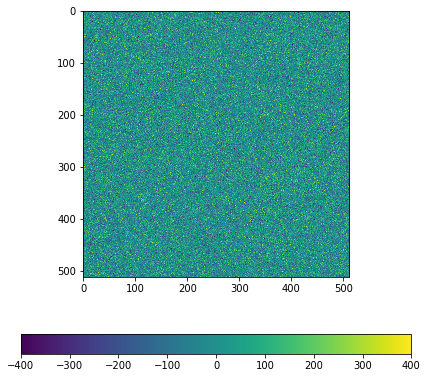

In [3]:
plt.figure(figsize=(7,7))
plt.imshow(N,vmin=-400.,vmax=+400.)
plt.colorbar(orientation="horizontal")

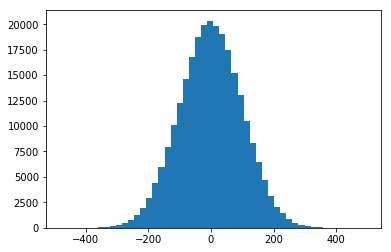

In [4]:
#Check histogram
plt.hist(N.flatten(),50)
plt.show()

In [5]:
#Take Fourier transform
F = np.fft.fft2(N)
#Absolute value
a = np.abs(np.fft.fft2(N))

In [6]:
#Checking the angles
theta = np.angle(F)

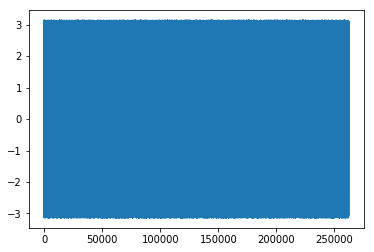

In [7]:
plt.plot(theta.flatten())
plt.show()

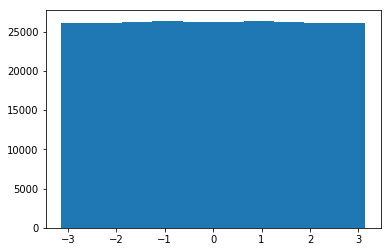

In [8]:
plt.hist(theta.flatten())
plt.show()

In [9]:
#Getting a new exponential from other random realization

new = np.fft.fft2(np.random.normal(mu,sigma,(Ny,Nx)))
new_exp = new/np.abs(new)


In [10]:
B_F = a*new_exp

In [11]:
#Checking the new angles
angles = np.angle(B_F)

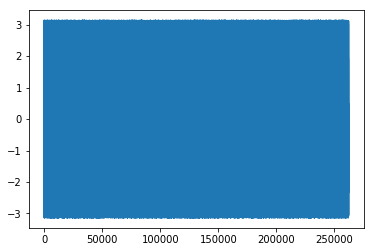

In [12]:
plt.plot(angles.flatten())
plt.show()

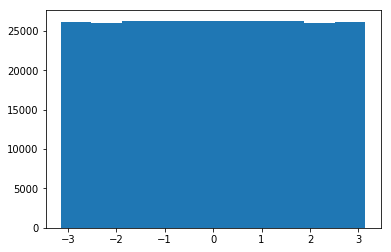

In [13]:
plt.hist(angles.flatten())
plt.show()

In [14]:
np.fft.ifft2(B_F)

array([[ -27.74854365+7.99360578e-15j,  109.55248479+4.71960951e-15j,
          71.10677993-1.12123975e-14j, ...,
          -9.57294597-2.94492757e-14j,  -89.15124938+3.39589827e-14j,
        -131.76599786+1.30203300e-14j],
       [ -74.99305806+2.38674369e-15j, -100.77430485-1.43666946e-14j,
         -58.7222086 -3.07548972e-15j, ...,
        -187.62216679+5.40269910e-14j,   71.69798824+5.37715594e-16j,
        -135.59962632+1.93911068e-15j],
       [  19.07112923-1.43743909e-14j,  -17.64548207+2.20963848e-14j,
         156.70788695-1.68230814e-14j, ...,
          54.92464029-2.25488289e-14j, -152.69958354+1.91854356e-14j,
         -34.00912334+2.90489166e-14j],
       ...,
       [ 112.63561376-9.93312559e-15j,  -66.11724962+9.29960786e-15j,
         -61.47560423-8.06622300e-15j, ...,
         -71.93753505-6.60368037e-15j,  -65.80162175+6.23411320e-14j,
         127.95106392-4.92566593e-14j],
       [ 176.16859865-2.75296150e-14j,   -6.50252293-8.03643455e-15j,
          29.06328034+

In [15]:
back = np.real(np.fft.ifft2(B_F))

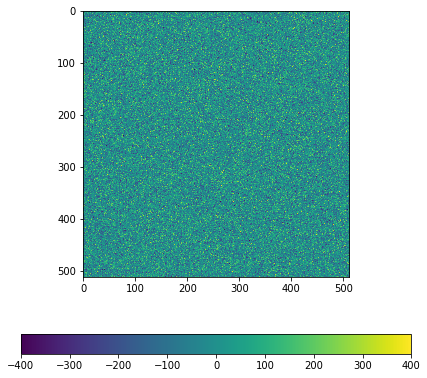

In [16]:
plt.figure(figsize=(7,7))
plt.imshow(back,vmin=-400.,vmax=+400.)
plt.colorbar(orientation="horizontal")
plt.show()

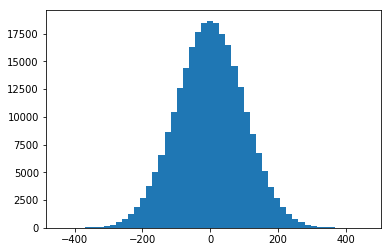

In [17]:
plt.hist(back.flatten(),50)
plt.show()

In [18]:
np.std(back)

99.8484737327812

In [19]:
np.std(N)

99.84847373278122

In [20]:
np.std(N)/np.std(back)

1.0000000000000002